In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# For reference, see chapter 9 of Python for Data Analysis, 3rd Edition
# https://wesmckinney.com/book/plotting-and-visualization.html

# Plotting directly from pandas

pandas has built-in capabilities that allow you to make some simple kinds of graphs directly from DataFrame indices and columns.

## Line graphs

In [44]:
url = 'https://github.com/nytimes/covid-19-data/raw/master/us.csv'
covid = pd.read_csv(url)
covid.tail()

,date,cases,deaths
1039,2022-11-25,98297328,1087089
1040,2022-11-26,98298518,1087090
1041,2022-11-27,98304822,1087100
1042,2022-11-28,98362219,1087290
1043,2022-11-29,98409758,1087602


<AxesSubplot:>

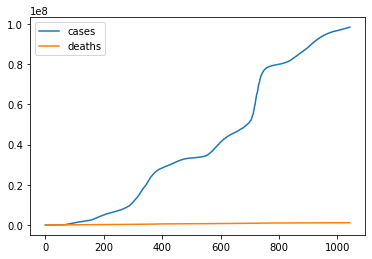

In [45]:
covid.plot()
# covid.plot(kind='line') # .plot() defaults to this specific kind of plot
# covid.plot.line() # alternate method of specifying the kind of plot

Convert date strings to datetime objects, then set the date column as the row index.

In [46]:
# See https://stackoverflow.com/questions/25416955/plot-pandas-dates-in-matplotlib for setting X axis as dates
covid['date'] = pd.to_datetime(covid['date'], format='%Y-%m-%d') # converts string to datetime object
covid = covid.set_index(['date'])
covid.head()

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


<AxesSubplot:xlabel='date'>

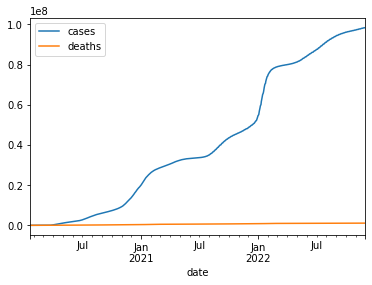

In [47]:
covid.plot()

## Scatterplot

In [48]:
# Scatter plot requires specifying both the X and Y columns as arguments
url = 'https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/falling_cats.csv'
cats = pd.read_csv(url)
cats.head()


,stories_fallen,injury_rate
0,2,0.7
1,3,1.0
2,4,1.9
3,5,2.0
4,6,2.3


<AxesSubplot:xlabel='stories_fallen', ylabel='injury_rate'>

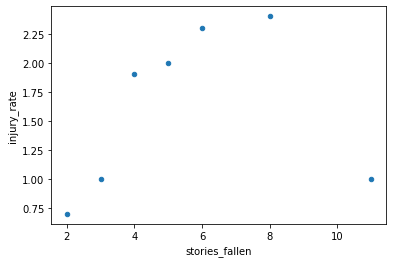

In [49]:
cats.plot.scatter('stories_fallen', 'injury_rate')

## Pie chart

In [50]:
url = 'https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/co2_state_2016_sector.xlsx'
state_co2_sector = pd.read_excel(url)
state_co2_sector = state_co2_sector.set_index('State')
state_co2_sector.head()

,Commercial,Electric Power,Residential,Industrial,Transportation,Total,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
State,,,,,,,,,,,,,,
Alabama,2.22,55.25,1.87,21.06,34.69,115.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,2.03,2.75,1.50,16.78,11.85,34.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,2.87,44.28,2.19,4.59,33.08,87.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,2.94,30.22,1.66,8.21,19.38,62.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,18.87,36.57,24.11,68.84,212.95,361.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Slice the Commercial through Transportation columns for a single row, resulting in a pandas series
az_sector_components = state_co2_sector.loc['Arizona', 'Commercial': "Transportation"]
az_sector_components

Commercial         2.87
Electric Power    44.28
Residential        2.19
Industrial         4.59
Transportation    33.08
Name: Arizona, dtype: float64

<AxesSubplot:ylabel='Arizona'>

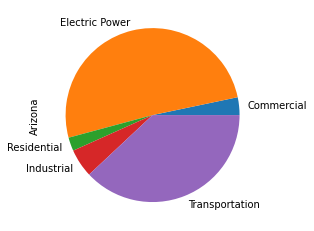

In [52]:
# The series labels will automatically be used as the labels on the chart
az_sector_components.plot(kind='pie')

## Bar chart

In [53]:
# Slice the state rows from Alabama through Wyoming for the single Total column, resulting in a pandas series
totals_by_state = state_co2_sector.loc['Alabama': 'Wyoming', 'Total']
totals_by_state.head()

State
Alabama       115.09
Alaska         34.91
Arizona        87.01
Arkansas       62.41
California    361.35
Name: Total, dtype: float64

<AxesSubplot:ylabel='State'>

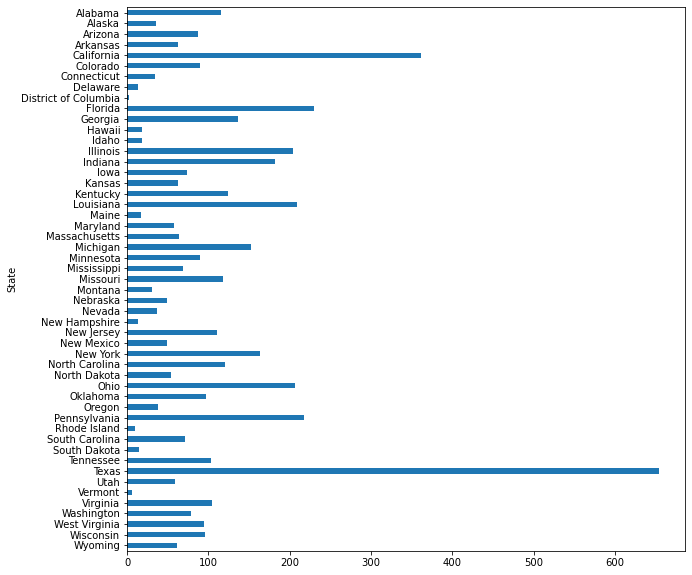

In [54]:
# The series labels will automatically be used as the bar chart labels.
totals_by_state.sort_index(ascending=False).plot(kind='barh', figsize=(10,10))

# pyplot from matplotlib

## Controlling display with figures and subplots

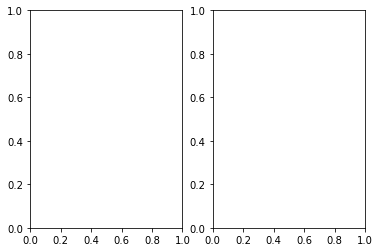

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure object
fig = plt.figure()

# Create 2 subplots with 1 row and 2 columns
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

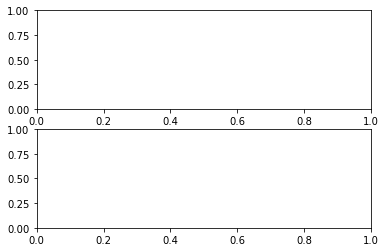

In [57]:
# Create a figure object
fig = plt.figure()

# Create 2 subplots with 2 rows and 1 column
axes1 = fig.add_subplot(2, 1, 1)
axes2 = fig.add_subplot(2, 1, 2)
plt.show() # displays the graph if you aren't using Jupyter notebooks

In [58]:
url = 'https://github.com/nytimes/covid-19-data/raw/master/us.csv'
covid = pd.read_csv(url)

# Slice the first 50 days of COVID 19 data

first_cases = covid.iloc[:50]
first_cases.tail()

,date,cases,deaths
45,2020-03-06,311,15
46,2020-03-07,428,19
47,2020-03-08,547,22
48,2020-03-09,748,26
49,2020-03-10,1018,31


In Jupyter notebooks, plots are reset after every cell, so setup code must be included in a single cell

Text(0.5, 1.0, 'deaths')

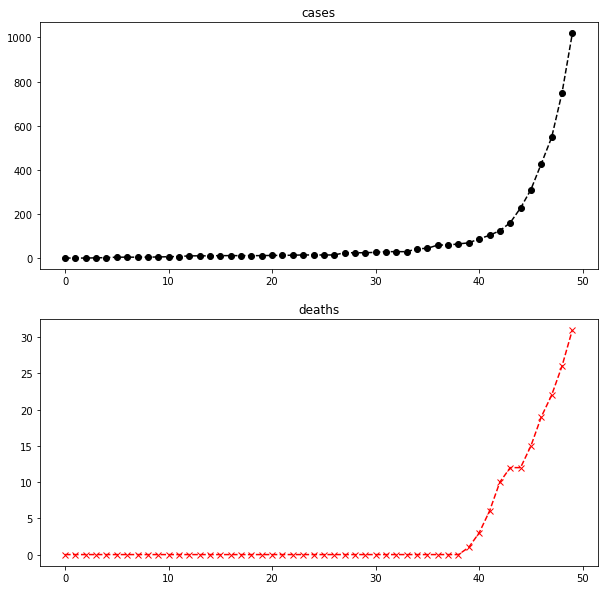

In [59]:
# Create a figure object
fig = plt.figure(figsize=(10,10))

# Create 2 subplots with 2 rows and 1 column
axes1 = fig.add_subplot(2, 1, 1)
axes2 = fig.add_subplot(2, 1, 2)

# .plot() method creates a line plot (points connected by a line)
axes1.plot(first_cases.index, first_cases['cases'], color='k', linestyle='dashed', marker='o')
axes1.set_title('cases')
# For convenience here I used the "dot" method for specifying the column instead of specifying it as
# an index as I did above.
axes2.plot(first_cases.index, first_cases.deaths, color='r', linestyle='dashed', marker='x')
axes2.set_title('deaths')

## Plot in a single subplot

Text(0.5, 1.0, 'start of the COVID 19 pandemic in the U.S.')

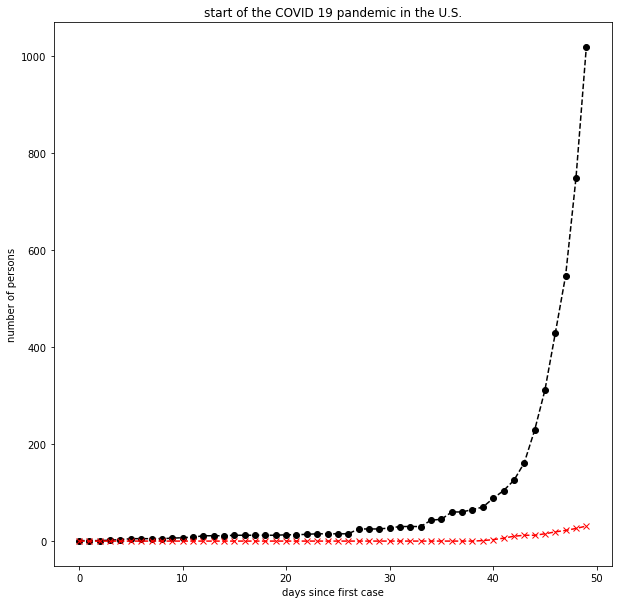

In [60]:
# Create a figure object
fig = plt.figure(figsize=(10,10))

# Create a single subplot
ax = fig.add_subplot(1, 1, 1)

ax.plot(first_cases.index, first_cases.cases, color='k', linestyle='dashed', marker='o')
ax.plot(first_cases.index, first_cases.deaths, color='r', linestyle='dashed', marker='x')

# set labels for subplot axes
ax.set_xlabel('days since first case')
ax.set_ylabel('number of persons')

ax.set_title('start of the COVID 19 pandemic in the U.S.')

Display as a bar graph (unstacked)

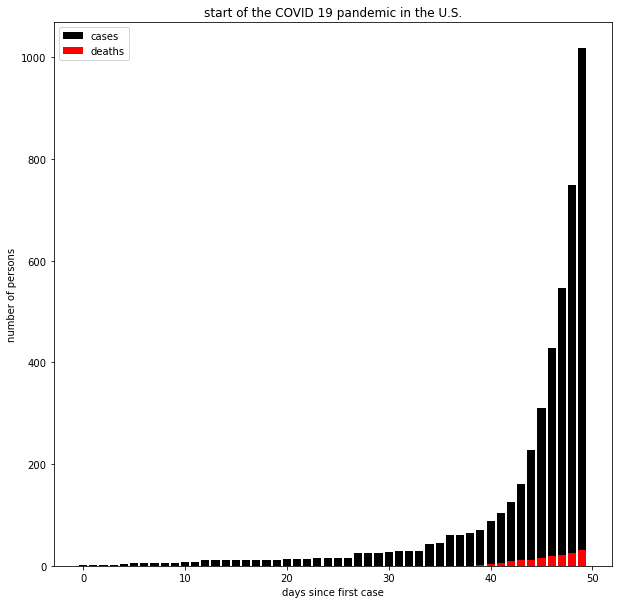

In [61]:
# Create a figure object
fig = plt.figure(figsize=(10,10))

# Create a single subplot
ax = fig.add_subplot(1, 1, 1)

# .bar() method creates a bar plot
# Including the plot labels allows the creation of a legend.
ax.bar(first_cases.index, first_cases.cases, color='k', label='cases')
ax.bar(first_cases.index, first_cases.deaths, color='r', label='deaths')

ax.set_xlabel('days since first case')
ax.set_ylabel('number of persons')
ax.set_title('start of the COVID 19 pandemic in the U.S.')
ax.legend() # Display the legend

## Scatterplot with best fit curve

In [62]:
# Reload the falling cats data
url = 'https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/falling_cats.csv'
cats = pd.read_csv(url)
cats.head()

,stories_fallen,injury_rate
0,2,0.7
1,3,1.0
2,4,1.9
3,5,2.0
4,6,2.3


In [63]:
# For convenience, extract the column data as pandas Series
# We'll use them multiple times later.
stories_fallen = cats['stories_fallen']
print(stories_fallen)
print()
injury_rate = cats['injury_rate']
print(injury_rate)

0     2
1     3
2     4
3     5
4     6
5     8
6    11
Name: stories_fallen, dtype: int64

0    0.7
1    1.0
2    1.9
3    2.0
4    2.3
5    2.4
6    1.0
Name: injury_rate, dtype: float64


Recreate the cat scatterplot, this time using `pyplot`.

Text(0, 0.5, 'average injury per cat')

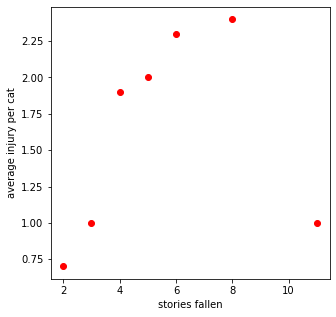

In [64]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

# .scatter() method creates an x,y scatterplot
# Pass in the two series as the x and y values.
ax.scatter(stories_fallen, injury_rate, color='r')

# set labels for subplot axes
ax.set_xlabel('stories fallen')
ax.set_ylabel('average injury per cat')

We can create a best-fit polynomial using numpy

In [65]:
import numpy as np

# Add a second-order polynomial best-fit function using NumPy
# In this case, we used second order (parabolic fit) instead of a straight line.
z = np.polyfit(stories_fallen, injury_rate, 2)
p = np.poly1d(z)


Recreate the plot, but now add the best fit line (as a line plot) to the subplot.

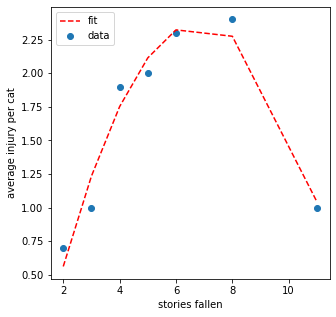

In [66]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('stories fallen')
ax.set_ylabel('average injury per cat')

# Create the scatterplot
ax.scatter(stories_fallen, injury_rate, label='data')

# Add the polynomial best fit curve as a dashed line

# plot type .plot() is a line plot rather than scatterplot
ax.plot(stories_fallen, p(stories_fallen), color='r', linestyle='dashed', label='fit')

# Add a legend
ax.legend(loc="upper left")


The following code generates 20 values evenly spaced between the minimum and maximum X values in the plot. These values will be used to smooth the best fit curve.

In [68]:
min_x = stories_fallen.min()
max_x = stories_fallen.max()
print(min_x, max_x)
fit_x_values = np.linspace(min_x, max_x, num=20)
fit_x_values

2 11


array([ 2.        ,  2.47368421,  2.94736842,  3.42105263,  3.89473684,
        4.36842105,  4.84210526,  5.31578947,  5.78947368,  6.26315789,
        6.73684211,  7.21052632,  7.68421053,  8.15789474,  8.63157895,
        9.10526316,  9.57894737, 10.05263158, 10.52631579, 11.        ])

Recreate the plot, using the more closely spaced points for the best fit curve.

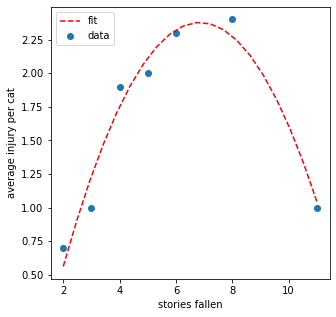

In [69]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('stories fallen')
ax.set_ylabel('average injury per cat')

# Create the scatterplot
ax.scatter(stories_fallen, injury_rate, label='data')

# Add the polynomial best fit curve as a dashed line
ax.plot(fit_x_values, p(fit_x_values), color='r', linestyle='dashed', label='fit')

# Add a legend
ax.legend(loc="upper left")

Dot plot with error bars

<ErrorbarContainer object of 3 artists>

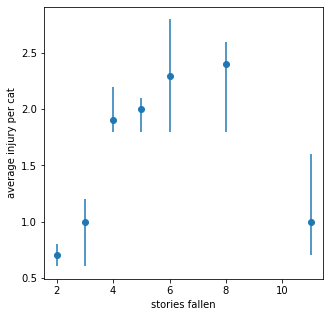

In [70]:
# The deviations can be passed in as any of several one-dimensional data objects: list, series, or Numpy array
# The deviations must have previously been calculated from the data -- in this case the numbers are just made up.
upper_deviation = [0.1, 0.2, 0.3, 0.1, 0.5, 0.2, 0.6]
lower_deviation = pd.Series([0.1, 0.4, 0.1, 0.2, 0.5, 0.6, 0.3])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('stories fallen')
ax.set_ylabel('average injury per cat')

# change plot type to error bar
ax.errorbar(stories_fallen, injury_rate, yerr=[lower_deviation, upper_deviation], fmt='o')


# Creating multiple graphs programatically

## Multiple pie charts

We will use some of our pandas DataFrame wrangling skills to prepare data for creating pie charts. We will create multiple charts by looping rather than by manually creating them one at a time.

In [71]:
url = 'https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/co2_state_2016_sector.xlsx'
state_co2_sector = pd.read_excel(url)
state_co2_sector = state_co2_sector.set_index('State')
state_co2_sector.tail()

,Commercial,Electric Power,Residential,Industrial,Transportation,Total,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
State,,,,,,,,,,,,,,
West Virginia,1.68,68.79,1.62,10.23,12.24,94.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wisconsin,5.90,38.54,8.65,13.05,29.48,95.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wyoming,1.11,40.26,0.85,10.67,7.78,60.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,233.38,1796.47,298.56,940.43,1892.15,5160.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop the last row (totals by sector)

In [72]:
state_co2_sector = state_co2_sector.drop('Total')
state_co2_sector.tail()

,Commercial,Electric Power,Residential,Industrial,Transportation,Total,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
State,,,,,,,,,,,,,,
Washington,4.37,9.53,5.08,10.96,48.92,78.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Virginia,1.68,68.79,1.62,10.23,12.24,94.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wisconsin,5.90,38.54,8.65,13.05,29.48,95.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wyoming,1.11,40.26,0.85,10.67,7.78,60.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sort decending by the state totals

In [73]:
decreasing = state_co2_sector.sort_values(by='Total', ascending=False)
decreasing.head()

,Commercial,Electric Power,Residential,Industrial,Transportation,Total,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
State,,,,,,,,,,,,,,
Texas,12.63,207.54,10.79,198.03,224.82,653.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,18.87,36.57,24.11,68.84,212.95,361.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,7.34,105.90,1.19,12.03,103.60,230.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pennsylvania,10.65,82.06,18.43,45.62,60.66,217.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Louisiana,2.19,36.14,1.81,121.74,47.25,209.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete the total column (no longer needed after sorting)

In [74]:
decreasing = decreasing.drop(['Total'], axis='columns')
decreasing.head()

,Commercial,Electric Power,Residential,Industrial,Transportation,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
State,,,,,,,,,,,,,
Texas,12.63,207.54,10.79,198.03,224.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,18.87,36.57,24.11,68.84,212.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,7.34,105.90,1.19,12.03,103.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pennsylvania,10.65,82.06,18.43,45.62,60.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Louisiana,2.19,36.14,1.81,121.74,47.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the number of states to plot isn't hard-coded in the script and since we are generating multiple plots programatically, the user can chose any number of states to plot.

The `.subplots()` method generates a sequence of subplots that can be accessed by their index number. This allows us to generate many subplots with a little bit of code in a loop.

In [79]:
number_of_states = int(input('How many states to plot? '))
fig = plt.figure(figsize=(5, 4*number_of_states))
ax = fig.subplots(number_of_states, 1)
for subplot in range(number_of_states):
    ax[subplot].pie(decreasing.iloc[subplot], labels=decreasing.columns)
    ax[subplot].set_title(decreasing.index[subplot])


ValueError: cannot convert float NaN to integer

posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 360x3456 with 12 Axes>

# Optional

This last example is a lot more complicated, but shows more possibilities for plotting.

## Creating a stacked bar chart 

One of the deficiencies of pie charts is that they only show the relative fraction of the sectors. A stacked bar chart shows not only the relative fraction of the sectors, but also the overall magnitude. So it's a better visualization type. Unfortunately, it's not easy to create stacked bar charts in Matplotlib.

In [80]:
# Reload state_co2_sector if necessary
url = 'https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/co2_state_2016_sector.xlsx'
state_co2_sector = pd.read_excel(url)
state_co2_sector.tail()

,State,Commercial,Electric Power,Residential,Industrial,Transportation,Total,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
48,West Virginia,1.68,68.79,1.62,10.23,12.24,94.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Wisconsin,5.90,38.54,8.65,13.05,29.48,95.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Wyoming,1.11,40.26,0.85,10.67,7.78,60.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Total,233.38,1796.47,298.56,940.43,1892.15,5160.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Extract sector data for the top few states
number_of_states = 4
top_state_sectors = state_co2_sector.set_index('State').drop('Total').sort_values(by='Total', ascending=False).drop(['Total'], axis='columns')[:number_of_states]
top_state_sectors

,Commercial,Electric Power,Residential,Industrial,Transportation,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
State,,,,,,,,,,,,,
Texas,12.63,207.54,10.79,198.03,224.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,18.87,36.57,24.11,68.84,212.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,7.34,105.90,1.19,12.03,103.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pennsylvania,10.65,82.06,18.43,45.62,60.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


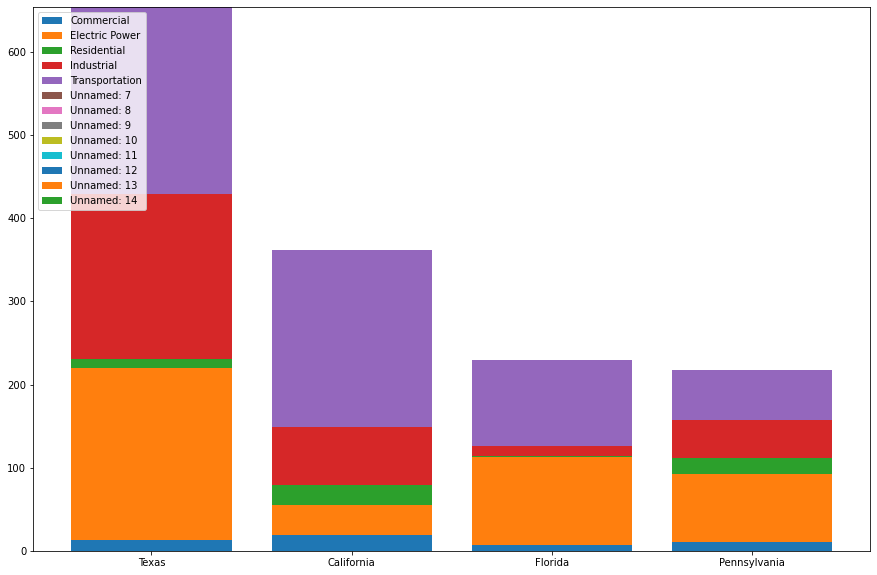

In [82]:
# Based on example at https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/1/ch01lvl1sec17/plotting-stacked-bar-charts
# See also https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html

import numpy as np

# Create a figure object
fig = plt.figure(figsize=(15,10))

# Create a single subplot
ax = fig.add_subplot(1, 1, 1)

# Create a numpy array with one element for each row
ind = np.arange(len(top_state_sectors))
#print(ind)

# Extract the row and column labels as numpy arrays from pandas series
row_labels = top_state_sectors.index.values
column_labels = top_state_sectors.columns.values

for sector_number in range(len(top_state_sectors.columns)):
    #print(sector_number)
    #print(top_state_sectors.iloc[:, :sector_number])
    sector_sums = top_state_sectors.iloc[:, :sector_number].sum(axis='columns')
    #print(sector_sums)
    ax.bar(ind, top_state_sectors.iloc[:, sector_number], bottom=sector_sums)

# These functions operate on the most recently active subplot; we have only one in this example
plt.xticks(ind, row_labels)
plt.legend(column_labels)


There are many, many types of plots and options. See the [matplotlib gallery](https://matplotlib.org/3.1.1/gallery/index.html) for examples. For more complex plot types, it may be easier to use seaborn, a high-level statistical graphics library built on matplotlib. See https://seaborn.pydata.org/ for more information.

# Practice

See [this page](https://github.com/HeardLibrary/digital-scholarship/tree/master/data/codegraf) for information about the dataset. You will need to download the `flight_data_set.zip` file and extract it into the working folder.

**Problem 1. Plot average delay time by carrier**

Load the data into a DataFrame

In [87]:
url = '/Users/gennachiaro/Documents/coding/learning-coding/digital-scholarship/data/codegraf/flight_data_set.csv'
flights = pd.read_csv(url)
flights.head()

,Airport Code,Airport Name,Minutes of Delay per Flight,Carrier Code,Carrier Name,City,Date,Minutes of Delay,Number of Flights,Ontime Category,State
0,PHX,Phoenix Sky Harbor International,NaN,9E,Pinnacle,Phoenix,1/1/2013,NaN,0.0,Cancelled,AZ
1,DEN,Denver International,NaN,9E,Pinnacle,Denver,1/1/2013,NaN,2.0,Cancelled,CO
2,MCO,Orlando International,NaN,9E,Pinnacle,Orlando,1/1/2013,NaN,2.0,Cancelled,FL
3,ATL,Hartsfield-Jackson Atlanta,NaN,9E,Pinnacle,Atlanta,1/1/2013,NaN,59.0,Cancelled,GA
4,ORD,Chicago O'Hare International,NaN,9E,Pinnacle,Chicago,1/1/2013,NaN,13.0,Cancelled,IL


Look at the "Minutes of Delay per Flight" column in the original data file. The blank cells have been imported as `NaN`, but they actually represent flights that were on time (delay of zero). Convert all `NaN` values in that column to 0. 

After doing the conversion, use the this code to group the data by `Carrier Name` and then find the mean minutes of delay:

```
grouped_carrier = flights.groupby(['Carrier Name']).mean()
```

See the ["Grouping and group operations" section of the optional "Summarizing and rearranging DataFrames" lesson](https://heardlibrary.github.io/digital-scholarship/script/codegraf/009c/#grouping-and-group-operations-5m13s) to understand how the `.groupby()` and `.mean()` methods work to summarize data by a category.

In [92]:
flights['Minutes of Delay per Flight'] = flights['Minutes of Delay per Flight'].fillna(0)
#flights = flights.sort_values(by = 'Minutes of Delay', ascending = False)
flights.head()

grouped_carrier = flights.groupby(['Carrier Name']).mean()

grouped_carrier.head()


,Minutes of Delay per Flight,Minutes of Delay,Number of Flights
Carrier Name,,,
A. Eagle,34.154221,4287.151948,169.791388
AirTran,23.732143,1492.541270,87.257004
Alaska,17.348765,461.759259,52.619645
American,30.026705,3459.195455,181.995392
Delta,32.554545,3826.459091,271.274449


Create a horizontal bar plot showing the average minutes of delay per flight by carrier, sorted in descending order.

<AxesSubplot:xlabel='Carrier Name'>

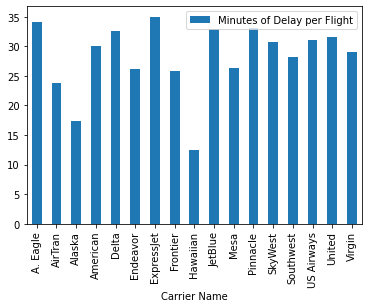

In [93]:
grouped_carrier.plot.bar(y = 'Minutes of Delay per Flight')

**Problem 2. Plot Minutes of Delay per Flight for Delta Airlines**

Create a copy of the `flights` DataFrame and convert the date column to a datetime object. Create a slice of the data that includes only Delta as the carrier. Use the `.groupby()` and `.sum()` methods to calculate the total minutes that Delta flights were late on a particular Date. See the [Slicing rows by boolean condition](https://heardlibrary.github.io/digital-scholarship/script/codegraf/009b/#slicing-rows-by-boolean-condition-7m00s) section of the "Extracting and changing DataFrame data" lesson if you forget how to slice rows by condition. NOTE: the `.sum()` method is used the same way as the `.mean()` method in the previous problem.

Create a time series plot of the "Minutes of Delay" column for the Delta data. Use a figure size of (20,10). If you want to have control over the display of the dates on the X axis, you can use the following code:

```
import matplotlib.dates as mdates
date_format = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)
```

Recall that all of the code related to a particular plot must be in the same cell.

**Problem 3. Seasonal pattern of delays across airlines**

Does this pattern hold across airlines? Make a copy of the `flights` DataFrame and convert the date strings into DateTime format. Group the flights by date. Find the mean, create a Series by slicing out the `Minutes of Delay per Flight` column, and assign it a name. Find the standard deviation, create a Series by slicing out the `Minutes of Delay per Flight` column, and assign it a name. 

Now create an errorbar plot with one of the series indices as the X variable and the mean series as the Y value. Use the standard deviation series as both the upper and lower bounds of the error bars.

How do the differences by date compare to the amount of variability among the airlines?